# REVENUE GENERATION PREDICTOR

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [145]:
from sklearn import model_selection # for train test split
from sklearn import preprocessing # for scaling

In [146]:
df=pd.read_csv("shopintention.csv")

In [147]:
df.head(10) #peek at the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [148]:
#renaming the columns
names=["admin","admin_dur","info","info_dur","prodrel","prodrel_dur","brate","erate","pagev","sday","month","os","browser","region","ttype","vtype","weekend","revenue"]


In [149]:
#checking the percentage of NaN or missing values under each variable
df.columns=names
index=df.columns[df.isna().any(axis=0)]
dict={}
for i in index:
    temp=df[i].isna().astype(int).sum()
    dict[i]=[temp/df.shape[0],temp]

#### Missing value under each random variable(given it contains at least one missing value)

In [150]:
dict

{'admin': [0.0011354420113544202, 14],
 'admin_dur': [0.0011354420113544202, 14],
 'info': [0.0011354420113544202, 14],
 'info_dur': [0.0011354420113544202, 14],
 'prodrel': [0.0011354420113544202, 14],
 'prodrel_dur': [0.0011354420113544202, 14],
 'brate': [0.0011354420113544202, 14],
 'erate': [0.0011354420113544202, 14]}

In [151]:
df.loc[df.isna().any(axis=1)]# checking the total number of rows affected by missing values

,admin,admin_dur,info,info_dur,prodrel,prodrel_dur,brate,erate,pagev,sday,month,os,browser,region,ttype,vtype,weekend,revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


#### Unique values under each random variable and their counts

In [152]:
cont=[]
for i in list(df.columns):
    print(i)
    print(len(df[i].unique()),"#######",df[i].unique())
    if len(df[i].unique())>20:
       cont.append(i)    ### making a list of continous variables
    print("===============================================================")
cont.append('sday')

admin
28 ####### [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
admin_dur
3337 ####### [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
info
18 ####### [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
info_dur
1260 ####### [  0.    -1.   120.   ... 547.75 368.25 211.25]
prodrel
312 ####### [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 1

### % of +ve and -ve cases in the given dataset

In [153]:
df["revenue"]=df["revenue"].replace({False:0,True:1})#replacing True/False with 1/0 in the target variable
df["revenue"].value_counts()/df.shape[0]

0    0.845255
1    0.154745
Name: revenue, dtype: float64

In [154]:
cont.append('info')
cat=[]
for i in list(df.columns):
    if i not in cont:
        cat.append(i)#amking a list of categorical random variables
cat=cat[:-1]

#### LIST OF CATEGORICAL AND CONTINOUS RANDOM VARIABLE

In [155]:
print(cat)

['month', 'os', 'browser', 'region', 'ttype', 'vtype', 'weekend']


In [156]:
print(cont)

['admin', 'admin_dur', 'info_dur', 'prodrel', 'prodrel_dur', 'brate', 'erate', 'pagev', 'sday', 'info']


In [157]:
### Dropping the missing values 
df1=df
df1=df1.dropna()

### BOXPLOTS FOR EACH CONTINOUS RANDOM VARIABLES

<AxesSubplot:ylabel='admin'>

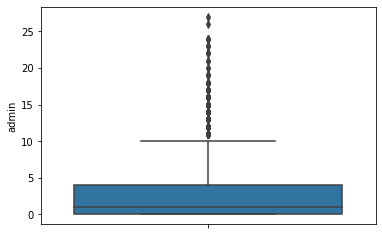

In [158]:
sns.boxplot(y=cont[0],data=df1)

<AxesSubplot:ylabel='admin_dur'>

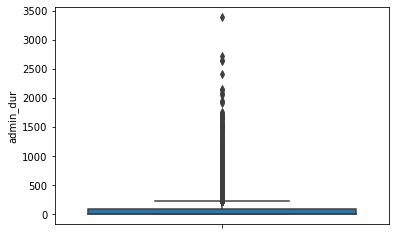

In [159]:
sns.boxplot(y=cont[1],data=df1)

<AxesSubplot:ylabel='info_dur'>

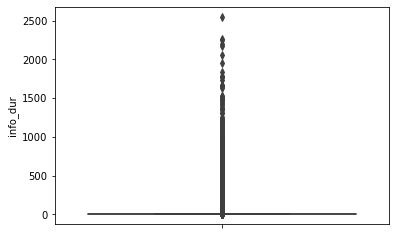

In [160]:
sns.boxplot(y=cont[2],data=df1)

<AxesSubplot:ylabel='prodrel'>

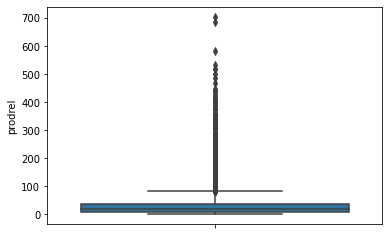

In [161]:
sns.boxplot(y=cont[3],data=df1)

<AxesSubplot:ylabel='prodrel_dur'>

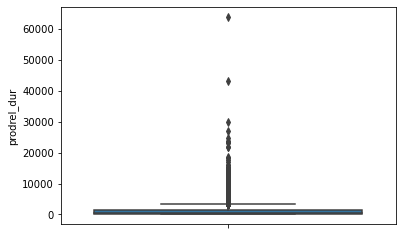

In [162]:
sns.boxplot(y=cont[4],data=df1)

<AxesSubplot:ylabel='pagev'>

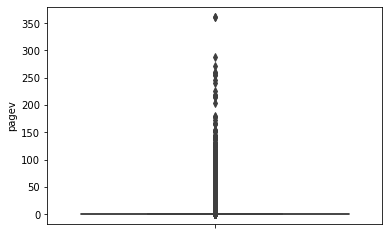

In [163]:


sns.boxplot(y=cont[7],data=df1)

<AxesSubplot:ylabel='erate'>

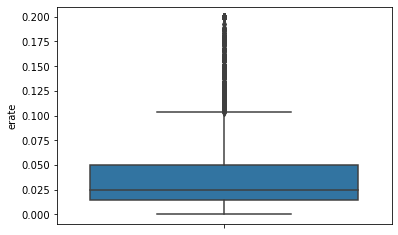

In [164]:
sns.boxplot(y=cont[6],data=df1)

<AxesSubplot:ylabel='brate'>

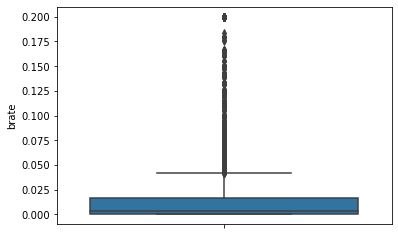

In [165]:
sns.boxplot(y=cont[5],data=df1)

In [166]:
df1.shape#shape of the daaset after dropping missing values

(12316, 18)

In [167]:
'''X_train=df1.iloc[:,:-1]
#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)

y_train=df1['revenue']


X_train.loc[X_train.isna().any(axis=1)]

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.7,random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.loc[X_train.isna().any(axis=1)]

X_train.shape

y_train.shape

type(y_train)

X_train.loc[y_train==0].shape[0]/X_train.shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train,y_train)

X_train.loc[y_train==0].shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)


X_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]

X_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]'''

"X_train=df1.iloc[:,:-1]\n#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)\n\ny_train=df1['revenue']\n\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nfrom imblearn.over_sampling import SMOTE\nsmote=SMOTE(sampling_strategy=0.7,random_state=10)\nX_train, y_train = smote.fit_resample(X_train, y_train)\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nX_train.shape\n\ny_train.shape\n\ntype(y_train)\n\nX_train.loc[y_train==0].shape[0]/X_train.shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.combine import SMOTETomek\nsmk = SMOTETomek()\nX_res,y_res=smk.fit_resample(X_train,y_train)\n\nX_train.loc[y_train==0].shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.under_sampling import TomekLinks\n\ntl = TomekLinks()\nX_tl, y_tl = tl.fit_resample(X_train, y_train)\n\n\nX_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]\n\nX_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]"

## Preparing training and test data

In [168]:
X=df1.iloc[:,:-1]
X=pd.get_dummies(X,columns=cat,drop_first=True)#one hot encoding of categorical random variables
y=df1['revenue']
#Splitting the dataset into train and test
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=20)

In [169]:
Xtrain.shape

(9852, 68)

In [170]:
X

,admin,admin_dur,info,info_dur,prodrel,prodrel_dur,brate,erate,pagev,sday,...,ttype_14,ttype_15,ttype_16,ttype_17,ttype_18,ttype_19,ttype_20,vtype_Other,vtype_Returning_Visitor,weekend_True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,1,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
#SCALING THE TEST AND TRAIN DATA
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[cont]) # fit is called only on training data 
Xtrain[cont]=scaler.transform(Xtrain[cont])
Xtest[cont]=scaler.transform(Xtest[cont])

In [172]:
print(Xtrain.shape[0],ytrain.shape[0],"====",Xtest.shape[0],ytest.shape[0])

9852 9852 ==== 2464 2464


In [173]:
for i in list(Xtrain.columns):
    print(i)
    print(len(Xtrain[i].unique()),"#######",Xtrain[i].unique())
      
    print("===============================================================")

admin
27 ####### [-0.69253245 -0.08956928  2.0208018   0.51339388  1.11635705  1.71932022
  3.22672814 -0.39105087  0.2119123   0.81487547  2.92524655  2.32228339
  1.41783863  6.54302556  2.62376497  4.43265447  3.52820972  7.44747031
  4.13117289  3.8296913   5.33709922  5.03561764  4.73413606  5.94006239
  5.63858081  7.14598873  6.24154397]
admin_dur
2786 ####### [-0.45294348 -0.43039394  4.64654003 ...  0.09858058 -0.23684376
  0.78145568]
info
14 ####### [-0.40218762  2.8396634   1.21873789  0.40827514  4.4605889   2.02920064
  3.65012615  6.89197717  6.08151441  5.27105166  9.32336543  7.70243992
 10.94429093 19.04891847]
info_dur
1064 ####### [-0.24684203  0.38213372  0.07957253 ... -0.11690392 -0.13573553
  8.41569815]
prodrel
281 ####### [ 1.05845669e-01 -4.91755774e-01  2.31237408e+00 -4.45786432e-01
 -5.60709787e-01  5.98763275e-02  4.73600404e-01  3.81661720e-01
  8.41355138e-01 -4.68771103e-01 -3.76832420e-01  2.43753695e-01
  5.65539087e-01 -2.61909065e-01  3.35692378e-0

2 ####### [0 1]
ttype_11
2 ####### [0 1]
ttype_12
2 ####### [0 1]
ttype_13
2 ####### [0 1]
ttype_14
2 ####### [0 1]
ttype_15
2 ####### [0 1]
ttype_16
2 ####### [0 1]
ttype_17
2 ####### [0 1]
ttype_18
2 ####### [0 1]
ttype_19
2 ####### [0 1]
ttype_20
2 ####### [0 1]
vtype_Other
2 ####### [0 1]
vtype_Returning_Visitor
2 ####### [1 0]
weekend_True
2 ####### [1 0]


In [174]:
#RESAMPLING TO 70:30 FROM 85:15
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
count_class_0 = int(Xtrain.loc[ytrain==0].shape[0]/1)
count_class_1 = int((count_class_0)*(30/70))
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1}),NearMiss(sampling_strategy={0: count_class_0}))
X_smt,y_smt = pipe.fit_resample(Xtrain,ytrain)

In [175]:
X_smt.loc[y_smt==0].shape[0]/X_smt.shape[0]

0.7

In [176]:
X_smt.loc[y_smt==1].shape[0]/X_smt.shape[0]

0.3

<AxesSubplot:>

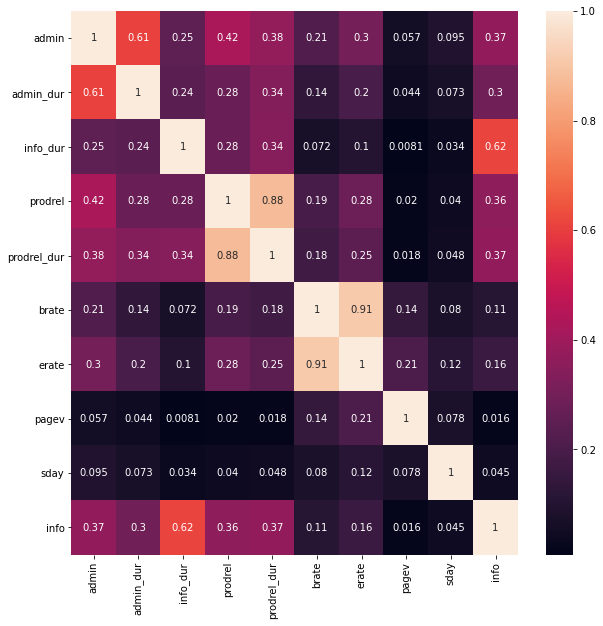

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(X_smt[cont].corr()),annot=True)

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=X_smt[cont].columns
vif['vif']=[variance_inflation_factor(X_smt[cont].values,i) for i in range(X_smt[cont].shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)

In [179]:
vif

,features,vif
6,erate,7.13
5,brate,6.47
3,prodrel,4.89
4,prodrel_dur,4.82
0,admin,1.96
9,info,1.81
1,admin_dur,1.71
2,info_dur,1.68
7,pagev,1.07
8,sday,1.03


In [180]:
Xtrain.loc[ytrain==0].shape[0]/Xtrain.shape[0]

0.8433820544051969

In [181]:
import statsmodels.api as sm
Xtrain_1=sm.add_constant(Xtrain)
logm1 = sm.GLM(ytrain,Xtrain_1, family = sm.families.Binomial())
logm1results=logm1.fit()
logm1results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                revenue   No. Observations:                 9852
Model:                            GLM   Df Residuals:                     9785
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 19 Mar 2022   Deviance:                   1.1577e+05
Time:                        19:59:26   Pearson chi2:                 5.66e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8.876e+13   4.82e+06  -1.84e+07      0.000   -8.88e+13   -8.88e+13
admin                    3.009e+13   9.49e+05   3.17e+07      0.000    3.01e+13    3.01e+13
admin_dur               -1.166e+12   8.82e+05  -1.32e+06      0.000   -1.17e+12   -1.17e+12
info                     3.436e+13    9.1e+05   3.77e+07      0.000    3.44e+13    3.44e+13
info_dur                -6.083e+13   8.72e+05  -6.98e+07      0.000   -6.08e+13   -6.08e+13
prodrel                  9.848e+13   1.41e+06   6.97e+07      0.000    9.85e+13    9.85e+13
prodrel_dur             -4.075e+12   1.38e+06  -2.95e+06      0.000   -4.07e+12   -4.07e+12
brate                    1.225e+14   1.76e+06   6.97e+07      0.000    1.22e+14    1.22e+14
erate                   -1.835e+14   1.86e+06  -9.87e+07      0.000   -1.83e+14   -1.83e+14
pagev                    4.982e+14      7e+05   7.11e+08      0.000    4.98e+14    4.98e+14
sday                     6.273e+12   7.81e+05   8.03e+06      0.000    6.27e+12    6.27e+12
month_Dec               -5.772e+14   4.17e+06  -1.39e+08      0.000   -5.77e+14   -5.77e+14
month_Feb                6.325e+13    6.7e+06   9.44e+06      0.000    6.33e+13    6.33e+13
month_Jul               -3.257e+11   5.14e+06  -6.33e+04      0.000   -3.26e+11   -3.26e+11
month_June               5.598e+13   5.65e+06   9.91e+06      0.000     5.6e+13     5.6e+13
month_Mar               -2.438e+14   4.14e+06   -5.9e+07      0.000   -2.44e+14   -2.44e+14
month_May                1.082e+14      4e+06   2.71e+07      0.000    1.08e+14    1.08e+14
month_Nov                2.069e+13   3.99e+06   5.19e+06      0.000    2.07e+13    2.07e+13
month_Oct               -7.605e+14   4.89e+06  -1.56e+08      0.000    -7.6e+14    -7.6e+14
month_Sep                -5.03e+14   5.12e+06  -9.83e+07      0.000   -5.03e+14   -5.03e+14
os_2                     3.222e+14   3.81e+06   8.45e+07      0.000    3.22e+14    3.22e+14
os_3                      5.92e+13      4e+06   1.48e+07      0.000    5.92e+13    5.92e+13
os_4                     1.491e+14   3.99e+06   3.74e+07      0.000    1.49e+14    1.49e+14
os_5                     8.947e+13   1.39e+07   6.45e+06      0.000    8.95e+13    8.95e+13
os_6                    -4.142e+14   1.84e+07  -2.25e+07      0.000   -4.14e+14   -4.14e+14
os_7                     9.011e+14   3.01e+07   2.99e+07      0.000    9.01e+14    9.01e+14
os_8                     4.846e+14    1.4e+07   3.46e+07      0.000    4.85e+14    4.85e+14
browser_2               -2.689e+14    3.8e+06  -7.07e+07      0.000   -2.69e+14   -2.69e+14
browser_3               -5.529e+14   8.16e+06  -6.77e+07      0.000   -5.53e+14   -5.53e+14
browser_4                -2.07e+14   4.78e+06  -4.33e+07      0.000   -2.07e+14   -2.07e+14
browser_5               -2.582e+14   5.17e+06  

In [182]:
import statsmodels.api as sm
Xtrain_1=sm.add_constant(X_smt)
logm1 = sm.GLM(y_smt,Xtrain_1, family = sm.families.Binomial())
logm1results=logm1.fit()
logm1results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                revenue   No. Observations:                11870
Model:                            GLM   Df Residuals:                    11803
Model Family:                Binomial   Df Model:                           66
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 19 Mar 2022   Deviance:                   2.1331e+05
Time:                        19:59:28   Pearson chi2:                 1.04e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.771e+15   3.24e+06   5.47e+08      0.000    1.77e+15    1.77e+15
admin                    5.482e+13   8.64e+05   6.35e+07      0.000    5.48e+13    5.48e+13
admin_dur               -3.589e+13   8.13e+05  -4.42e+07      0.000   -3.59e+13   -3.59e+13
info                     5.315e+13   8.18e+05    6.5e+07      0.000    5.32e+13    5.32e+13
info_dur                -4.919e+13   8.03e+05  -6.13e+07      0.000   -4.92e+13   -4.92e+13
prodrel                   1.32e+14   1.29e+06   1.02e+08      0.000    1.32e+14    1.32e+14
prodrel_dur              9.548e+13    1.3e+06   7.36e+07      0.000    9.55e+13    9.55e+13
brate                   -6.641e+12   1.72e+06  -3.87e+06      0.000   -6.64e+12   -6.64e+12
erate                    -2.19e+14    1.8e+06  -1.22e+08      0.000   -2.19e+14   -2.19e+14
pagev                    5.515e+14   5.22e+05   1.06e+09      0.000    5.51e+14    5.51e+14
sday                    -1.119e+13   7.55e+05  -1.48e+07      0.000   -1.12e+13   -1.12e+13
month_Dec               -1.225e+15   2.92e+06   -4.2e+08      0.000   -1.22e+15   -1.22e+15
month_Feb               -1.278e+15   6.07e+06  -2.11e+08      0.000   -1.28e+15   -1.28e+15
month_Jul               -9.835e+14   4.19e+06  -2.34e+08      0.000   -9.84e+14   -9.84e+14
month_June              -1.211e+15   4.82e+06  -2.51e+08      0.000   -1.21e+15   -1.21e+15
month_Mar               -1.146e+15   2.89e+06  -3.96e+08      0.000   -1.15e+15   -1.15e+15
month_May               -8.856e+14   2.74e+06  -3.23e+08      0.000   -8.86e+14   -8.86e+14
month_Nov               -5.019e+14   2.63e+06  -1.91e+08      0.000   -5.02e+14   -5.02e+14
month_Oct               -1.172e+15    3.8e+06  -3.09e+08      0.000   -1.17e+15   -1.17e+15
month_Sep               -1.471e+15   4.18e+06  -3.52e+08      0.000   -1.47e+15   -1.47e+15
os_2                     1.356e+14   2.71e+06   5.01e+07      0.000    1.36e+14    1.36e+14
os_3                     5.628e+13   3.02e+06   1.86e+07      0.000    5.63e+13    5.63e+13
os_4                    -3.225e+14   3.64e+06  -8.85e+07      0.000   -3.22e+14   -3.22e+14
os_5                    -2.339e+14   1.39e+07  -1.69e+07      0.000   -2.34e+14   -2.34e+14
os_6                     -4.87e+14   1.82e+07  -2.67e+07      0.000   -4.87e+14   -4.87e+14
os_7                    -4.785e+14   3.01e+07  -1.59e+07      0.000   -4.78e+14   -4.78e+14
os_8                    -7.519e+14   1.35e+07  -5.55e+07      0.000   -7.52e+14   -7.52e+14
browser_2               -3.429e+14   2.68e+06  -1.28e+08      0.000   -3.43e+14   -3.43e+14
browser_3               -5.565e+14   7.69e+06  -7.23e+07      0.000   -5.56e+14   -5.56e+14
browser_4               -4.859e+14   3.77e+06  -1.29e+08      0.000   -4.86e+14   -4.86e+14
browser_5               -5.989e+14   4.35e+06  

In [183]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
def printresults(actual,predicted):
    print("AUC : ",np.round( metrics.roc_auc_score(actual,predicted),4)  )
    print("accuracy : ",np.round( metrics.accuracy_score(actual,predicted),4)  )
    print("recall: ",np.round( metrics.recall_score(actual,predicted),4)  )
    print("precision : ",np.round( metrics.precision_score(actual,predicted),4)  )
    print("f1 : ",np.round( metrics.f1_score(actual,predicted),4)  )

## MODEL USING XTRAIN

Train Metric
AUC :  0.6859
accuracy :  0.8859
recall:  0.3947
precision :  0.7622
f1 :  0.5201
Test Metric
AUC :  0.6837
accuracy :  0.8892
recall:  0.3918
precision :  0.7371
f1 :  0.5116

Test confusion_matrix


Text(33.0, 0.5, 'True')

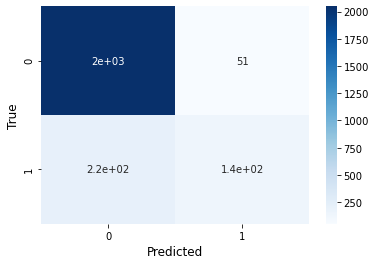

In [184]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
trainpred=model.predict(Xtrain)
testpred=model.predict(Xtest)
print("Train Metric")
printresults(ytrain,trainpred)
print("==========================")
print("Test Metric")
printresults(ytest,testpred)
print("==========================")
print("==========================")
cf_matrix = confusion_matrix(ytest, testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## MODEL USING X_SMT

Train Metric
AUC :  0.8056
accuracy :  0.8617
recall:  0.6655
precision :  0.8401
f1 :  0.7427
Test Metric
AUC :  0.7383
accuracy :  0.8819
recall:  0.5342
precision :  0.6171
f1 :  0.5727

Test confusion_matrix


Text(33.0, 0.5, 'True')

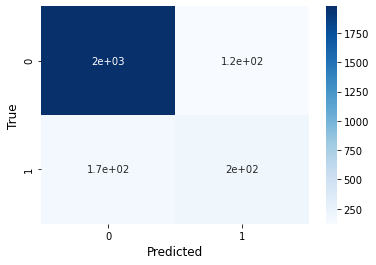

In [195]:
model=linear_model.LogisticRegression()
model.fit(X_smt,y_smt)
trainpred=model.predict(X_smt)
testpred=model.predict(Xtest)
print("Train Metric")
printresults(y_smt,trainpred)
print("==========================")
print("Test Metric")
printresults(ytest,testpred)
print("==========================")
print("==========================")
cf_matrix = confusion_matrix(ytest, testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [186]:
from sklearn import feature_selection

In [187]:
Xtrain.columns.shape

(68,)

## RFE ON XTRAIN

In [188]:
model=linear_model.LogisticRegression()
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=35)
rfeobj.fit(Xtrain,ytrain)
updated=list(Xtrain.columns[rfeobj.support_])

Train Metric
AUC :  0.6836
accuracy :  0.8852
recall:  0.3901
precision :  0.7601
f1 :  0.5156
Test Metric
AUC :  0.6796
accuracy :  0.888
recall:  0.3836
precision :  0.733
f1 :  0.5036

Test confusion_matrix


Text(33.0, 0.5, 'True')

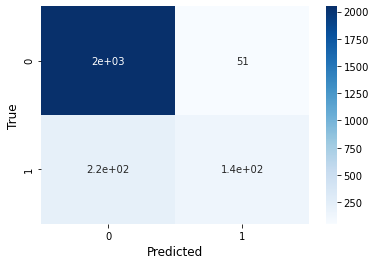

In [189]:
model=linear_model.LogisticRegression()
model.fit(Xtrain[updated],ytrain)
trainpred=model.predict(Xtrain[updated])
testpred=model.predict(Xtest[updated])
print("Train Metric")
printresults(ytrain,trainpred)
print("==========================")
print("Test Metric")
printresults(ytest,testpred)
print("==========================")
print("==========================")
cf_matrix = confusion_matrix(ytest, testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## DROP CORRELATED VARIABLE AND MAKE A MODEL on X_SMT

In [196]:
col_drop=['brate','prodrel_dur']
X_new=X_smt.drop(columns=col_drop)
X_new_test=Xtest.drop(columns=col_drop)

Train Metric
AUC :  0.8033
accuracy :  0.8598
recall:  0.6622
precision :  0.8365
f1 :  0.7392
Test Metric
AUC :  0.7342
accuracy :  0.8807
recall:  0.526
precision :  0.6134
f1 :  0.5664

Test confusion_matrix


Text(33.0, 0.5, 'True')

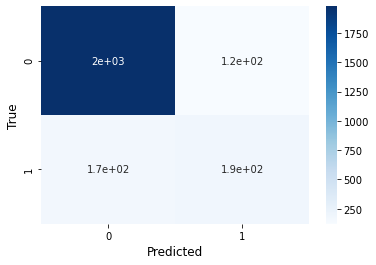

In [197]:
model=linear_model.LogisticRegression()
model.fit(X_new,y_smt)
trainpred=model.predict(X_new)
testpred=model.predict(X_new_test)
print("Train Metric")
printresults(y_smt,trainpred)
print("==========================")
print("Test Metric")
printresults(ytest,testpred)
print("==========================")
print("==========================")
cf_matrix = confusion_matrix(ytest, testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

## USING THRESHOLD ON X_SMT

Train Metric
AUC :  0.7639
accuracy :  0.8445
recall:  0.5625
precision :  0.8743
f1 :  0.6846
Test Metric
AUC :  0.692
accuracy :  0.8839
recall:  0.4192
precision :  0.674
f1 :  0.5169

Test confusion_matrix


Text(33.0, 0.5, 'True')

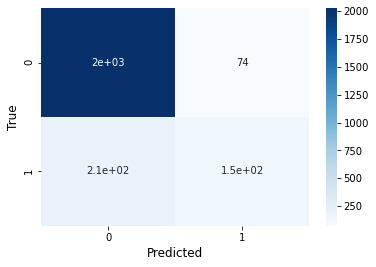

In [209]:
THRESHOLD = 0.62
model=linear_model.LogisticRegression()
model.fit(X_smt,y_smt)
trainpred=np.where(model.predict_proba(X_smt)[:,1] > THRESHOLD, 1, 0)
testpred=np.where(model.predict_proba(Xtest)[:,1] > THRESHOLD, 1, 0)
print("Train Metric")
printresults(y_smt,trainpred)
print("==========================")
print("Test Metric")
printresults(ytest,testpred)
print("==========================")
print("==========================")
cf_matrix = confusion_matrix(ytest, testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

### PLOTTING PRECISION-RECALL CURVE FOR TEST DATA

In [199]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import argmax

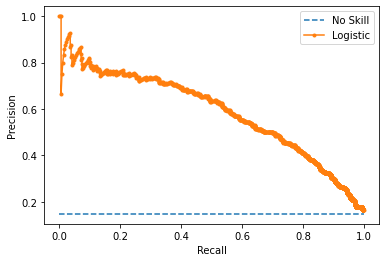

In [200]:
# predict probabilities
yhat = model.predict_proba(Xtest)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(ytest, yhat)
# plot the roc curve for the model
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

### FINDING OPTIMAL THRESHOLD FOR F-SCORE

Best Threshold=0.320524, F-Score=0.584


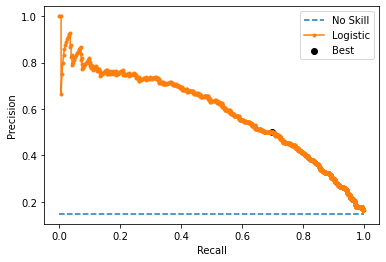

In [201]:
# predict probabilities
testX,testy=Xtest,ytest
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()